In [39]:
import shap
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation, Conv2D, MaxPooling2D

cif_data = tf.keras.datasets.cifar10
a,b = cif_data.load_data()
train = a
test = b
train_x = train[0][:100]
train_y = train[1][:100]

test_x = test[0][:100]
test_y = test[1][:100]


In [40]:
train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0

In [41]:
#Sequential model

model = Sequential()

#CONV -> RELU -> CONV -> RELU -> POOL -> DROPOUT
model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#CONV -> RELU -> CONV -> RELU -> POOL -> DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#FALTTEN -> DENSE -> RELU -> DROPOUT -> DENSE -> SOFTMAX
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [42]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
train_y.shape

(100, 1)

In [44]:
history = model.fit(train_x, train_y, epochs=25, validation_split=0.2, verbose=2)

Epoch 1/25
3/3 - 1s - loss: 2.3420 - accuracy: 0.0750 - val_loss: 2.2861 - val_accuracy: 0.2000 - 1s/epoch - 495ms/step
Epoch 2/25
3/3 - 0s - loss: 2.2382 - accuracy: 0.2000 - val_loss: 2.3083 - val_accuracy: 0.2000 - 264ms/epoch - 88ms/step
Epoch 3/25
3/3 - 0s - loss: 2.2321 - accuracy: 0.2000 - val_loss: 2.3553 - val_accuracy: 0.2000 - 202ms/epoch - 67ms/step
Epoch 4/25
3/3 - 0s - loss: 2.2499 - accuracy: 0.1500 - val_loss: 2.2902 - val_accuracy: 0.2000 - 211ms/epoch - 70ms/step
Epoch 5/25
3/3 - 0s - loss: 2.2167 - accuracy: 0.1250 - val_loss: 2.2805 - val_accuracy: 0.2000 - 208ms/epoch - 69ms/step
Epoch 6/25
3/3 - 0s - loss: 2.2147 - accuracy: 0.1625 - val_loss: 2.2755 - val_accuracy: 0.2500 - 199ms/epoch - 66ms/step
Epoch 7/25
3/3 - 0s - loss: 2.1846 - accuracy: 0.2000 - val_loss: 2.2826 - val_accuracy: 0.2000 - 194ms/epoch - 65ms/step
Epoch 8/25
3/3 - 0s - loss: 2.2139 - accuracy: 0.1625 - val_loss: 2.2779 - val_accuracy: 0.2000 - 202ms/epoch - 67ms/step
Epoch 9/25
3/3 - 0s - loss

In [45]:
explainer = shap.DeepExplainer(model, train_x)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [46]:
shap_values = explainer.shap_values(test_x[:10])

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [47]:
test_images = test_x[:10]

In [48]:
test_images.shape

(10, 32, 32, 3)

In [49]:
np.array(shap_values).shape

(10, 10, 32, 32, 3)

IndexError: index 3 is out of bounds for axis 0 with size 3

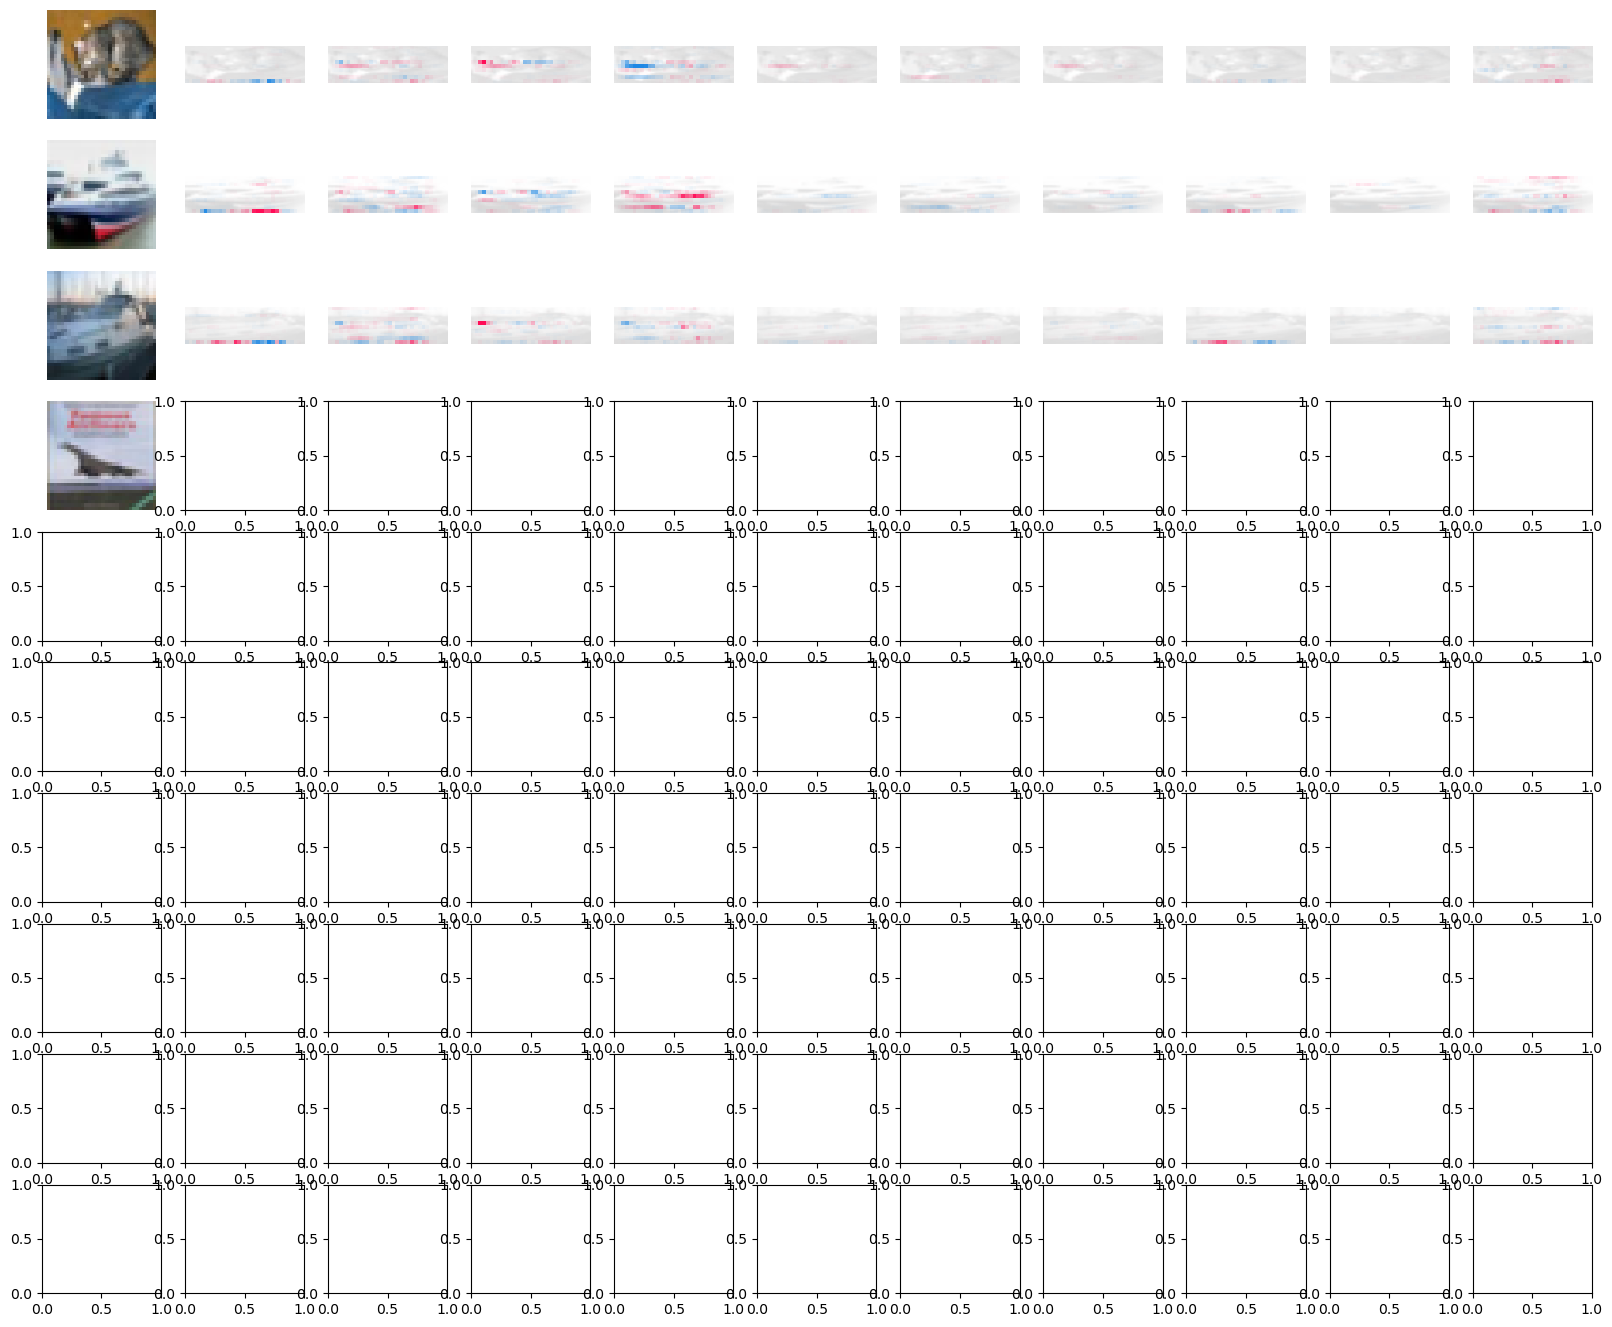

In [51]:
import matplotlib.pyplot as plt
shap_numpy = [np.moveaxis(s, [0, 1, 2, 3], [1, 2, 3, 0]) for s in shap_values]
test_numpy = test_images
shap.image_plot(shap_numpy, test_numpy)